In [1]:
import re
import string
import pandas as pd
import nltk
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD, NMF, PCA
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, accuracy_score, f1_score, precision_score
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import umap
import umap.plot
from yellowbrick.cluster import KElbowVisualizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

1. Escolha 10 documentos da base, e determine seu documento mais parecido (que não pode ser ele mesmo), usando:<br>
a) Representação vetorial CountVectorizer com similaridade do cosseno;<br>
b) Representação vetorial TF-IDF com similaridade do cosseno.

In [2]:
df = pd.read_csv('dataset/hacker_news_sample.csv')
df = df.dropna(subset=['text'])
# remove html symbols
df['text'] = df['text'].apply(lambda row: re.sub('\<[^>]*\>', ' ', row))
df['text'] = df['text'].apply(lambda row: re.sub('\&[^;]*\;', ' ', row))

stop_words = set(nltk.corpus.stopwords.words("english"))

temp = df['text'].apply(lambda row: [x for x in nltk.word_tokenize(row) if x not in stop_words])
df['text'] = temp.apply(lambda x: " ".join(x))

vectorizer = TfidfVectorizer()
all_texts = vectorizer.fit_transform(df['text'][:1000])
selected_texts = all_texts[:10]

for j in range(selected_texts.shape[0]):
    temp = 1
    aux = None
    for i in range(all_texts.shape[0]):
        d = distance.cosine(all_texts.toarray()[i].tolist(), selected_texts.toarray()[j].tolist())
        
        if d < temp and df['text'].iloc[j] != df['text'].iloc[i] and d != 0:
            temp = d
            aux = i
    print('text '+str(temp))
    print(df['text'].iloc[j])
    print('\nmost similar text')
    print(df['text'].iloc[aux]+'\n\n')


c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\spatial\distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


text 0.8814248185758736
leads say using C X ? Because know C fast lots libs available . They might also dislike Java CL . Not every engineering decision perfect lots factors play . Attempts combine best C ( speed ) best scripting languages ( easy things fast without pay attention ) opinion end merely joining worst worlds rather best worlds . The pay attention things needless complexity ( memory management etc ) . They reason put things get speed . If get adequate speed without nobody cares . Besides programming specific ? Do really want code stuff without worry details ? No programming getting results . Nobody cares details level programming language minutuae . We care effort put quality speed results coming ratio .

most similar text
Nintendo going patch eventually devs want give help speed probably get writeup patched .


text 0.8825474999851708
I would like point counter-examples : « Think journalists . Many losing jobs . Newspapers barely surviving . In old days every news event pr

In [3]:
vectorizer = CountVectorizer()
all_texts = vectorizer.fit_transform(df['text'][:1000])
selected_texts = all_texts[:10]

for j in range(selected_texts.shape[0]):
    temp = 1
    aux = None
    for i in range(all_texts.shape[0]):
        d = distance.cosine(all_texts.toarray()[i].tolist(), selected_texts.toarray()[j].tolist())
        
        if d < temp and df['text'].iloc[j] != df['text'].iloc[i] and d != 0:
            temp = d
            aux = i
    print('text '+str(temp))
    print(df['text'].iloc[j])
    print('\nmost similar text')
    print(df['text'].iloc[aux]+'\n\n')

text 0.8315844222026374
leads say using C X ? Because know C fast lots libs available . They might also dislike Java CL . Not every engineering decision perfect lots factors play . Attempts combine best C ( speed ) best scripting languages ( easy things fast without pay attention ) opinion end merely joining worst worlds rather best worlds . The pay attention things needless complexity ( memory management etc ) . They reason put things get speed . If get adequate speed without nobody cares . Besides programming specific ? Do really want code stuff without worry details ? No programming getting results . Nobody cares details level programming language minutuae . We care effort put quality speed results coming ratio .

most similar text
without likely learn untrue things . I prefer common Just actually state . The reason something I knew intuitively really ( And actually never devoted time ) put [ ting ] words . Thank .


text 0.7888045354912305
I would like point counter-examples : « Th

2. Elabore um problema de classificação binária de textos coerente com sua base.
a) Determine o rótulo dos documentos (separando os documentos em classes bem definidas).

In [4]:
data = df[['text', 'type']][:200]
temp = df[['text', 'type']][200:]
data = pd.concat([data, temp.loc[temp['type'] == 'story']])
# comment -> 0
# story -> 1

y = [0 if i == 'comment' else 1 for i in data['type']]

b) Extraia as representações vetoriais com CountVectorizer e TF-IDF.

In [5]:
count_vectorizer = CountVectorizer()
tfid_vectorizer = TfidfVectorizer()
x_count_vectorizer = count_vectorizer.fit_transform(data['text'])
x_tfid_vectorizer = tfid_vectorizer.fit_transform(data['text'])

c) Treine um classificador baseado em cada uma das duas representações vetoriais e Regressão Logística usando validação cruzada com 70% das amostras selecionadas para treino e 30% para teste. Exiba as matrizes de confusão, métricas de acurácia, precisão, recall e F1 score.

c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


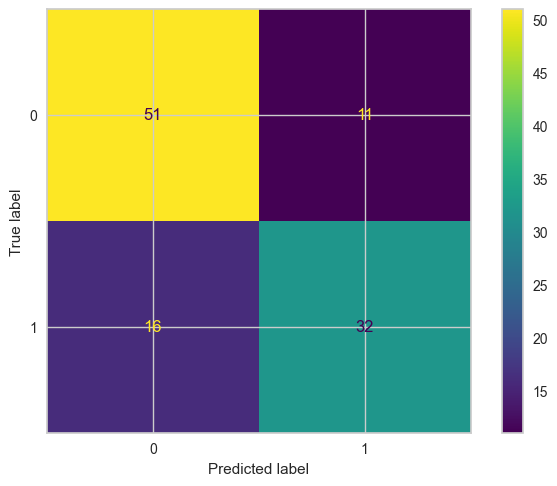

In [6]:
X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(x_count_vectorizer, y, test_size=0.3)
X_train_tfid, X_test_tfid, y_train_tfid, y_test_tfid = train_test_split(x_tfid_vectorizer, y, test_size=0.3)

model = LogisticRegression(class_weight="balanced").fit(X_train_count.toarray(), y_train_count)
pred = model.predict(X_test_count.toarray())

plot_confusion_matrix(model, X_test_count.toarray(), y_test_count)
plt.show()

In [7]:
print('F1 score '+str(f1_score(y_test_count, pred)))
print('recall '+str(recall_score(y_test_count, pred)))
print('precisao '+str(precision_score(y_test_count, pred)))
print('acuracia '+str(accuracy_score(y_test_count, pred)))

F1 score 0.7032967032967034
recall 0.6666666666666666
precisao 0.7441860465116279
acuracia 0.7545454545454545


c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


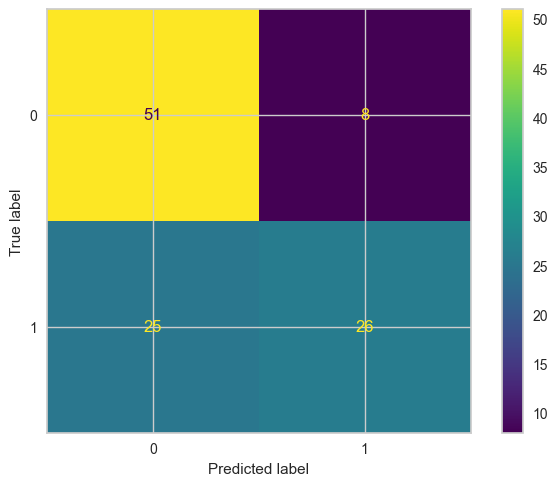

In [8]:
model = LogisticRegression(class_weight="balanced").fit(X_train_tfid.toarray(), y_train_tfid)
pred = model.predict(X_test_tfid.toarray())

plot_confusion_matrix(model, X_test_tfid.toarray(), y_test_tfid)
plt.show()

In [9]:
print('F1 score '+str(f1_score(y_test_tfid, pred)))
print('recall '+str(recall_score(y_test_tfid, pred)))
print('precisao '+str(precision_score(y_test_tfid, pred)))
print('acuracia '+str(accuracy_score(y_test_tfid, pred)))

F1 score 0.6117647058823529
recall 0.5098039215686274
precisao 0.7647058823529411
acuracia 0.7


d) Faça o mesmo para o classificador Naive-Bayes.

c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


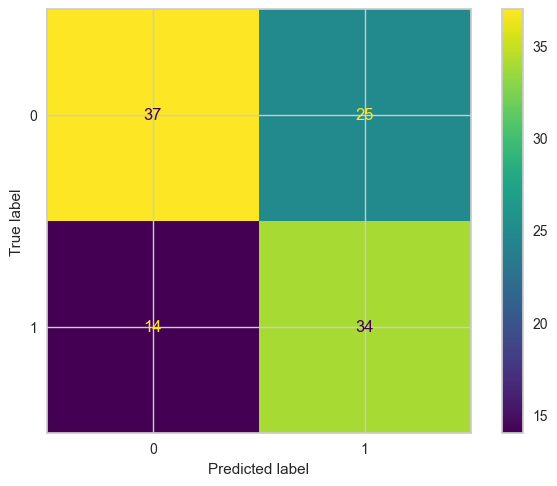

In [10]:
model = GaussianNB().fit(X_train_count.toarray(), y_train_count)
pred = model.predict(X_test_count.toarray())

plot_confusion_matrix(model, X_test_count.toarray(), y_test_count)
plt.show()

In [11]:
print('F1 score '+str(f1_score(y_test_count, pred)))
print('recall '+str(recall_score(y_test_count, pred)))
print('precisao '+str(precision_score(y_test_count, pred)))
print('acuracia '+str(accuracy_score(y_test_count, pred)))

F1 score 0.6355140186915889
recall 0.7083333333333334
precisao 0.576271186440678
acuracia 0.6454545454545455


c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


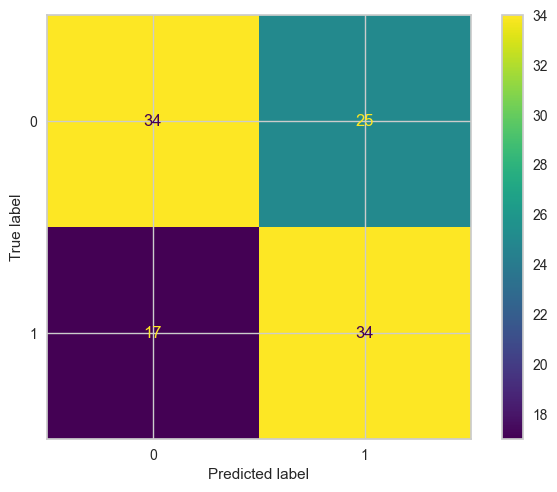

In [12]:
model = GaussianNB().fit(X_train_tfid.toarray(), y_train_tfid)
pred = model.predict(X_test_tfid.toarray())

plot_confusion_matrix(model, X_test_tfid.toarray(), y_test_tfid)
plt.show()

In [13]:
print('F1 score '+str(f1_score(y_test_tfid, pred)))
print('recall '+str(recall_score(y_test_tfid, pred)))
print('precisao '+str(precision_score(y_test_tfid, pred)))
print('acuracia '+str(accuracy_score(y_test_tfid, pred)))

F1 score 0.6181818181818182
recall 0.6666666666666666
precisao 0.576271186440678
acuracia 0.6181818181818182


e) Faça o mesmo para um outro classificador de sua preferencia (pesquise na biblioteca Scikit-learn).

c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


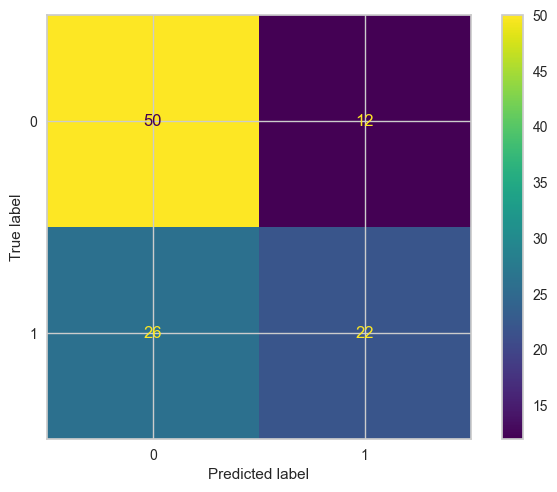

In [14]:
model = svm.SVC(class_weight="balanced").fit(X_train_count.toarray(), y_train_count)
pred = model.predict(X_test_count.toarray())

plot_confusion_matrix(model, X_test_count.toarray(), y_test_count)
plt.show()

In [15]:
print('F1 score '+str(f1_score(y_test_count, pred)))
print('recall '+str(recall_score(y_test_count, pred)))
print('precisao '+str(precision_score(y_test_count, pred)))
print('acuracia '+str(accuracy_score(y_test_count, pred)))

F1 score 0.5365853658536585
recall 0.4583333333333333
precisao 0.6470588235294118
acuracia 0.6545454545454545


c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


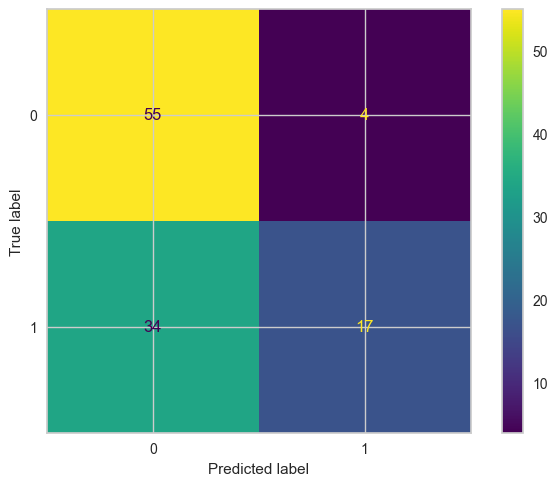

In [16]:
model = svm.SVC(class_weight="balanced").fit(X_train_tfid.toarray(), y_train_tfid)
pred = model.predict(X_test_tfid.toarray())

plot_confusion_matrix(model, X_test_tfid.toarray(), y_test_tfid)
plt.show()

In [17]:
print('F1 score '+str(f1_score(y_test_tfid, pred)))
print('recall '+str(recall_score(y_test_tfid, pred)))
print('precisao '+str(precision_score(y_test_tfid, pred)))
print('acuracia '+str(accuracy_score(y_test_tfid, pred)))

F1 score 0.4722222222222222
recall 0.3333333333333333
precisao 0.8095238095238095
acuracia 0.6545454545454545


3. Realize um comparativo entre os métodos LDA, SVD e NMF para realizar modelagem de tópicos. Para cada método:<br>
a) empiricamente, tente identificar uma quantidade de tópicos adequada para seu problema. Exiba resultados que justifiquem a quantidade de tópicos escolhida;<br>
b) identifique as 5 palavras mais relevantes de cada tópico;<br>
c) identifique os 3 tópicos mais relevantes de 5 documentos quaisquer (você pode representar os tópicos por suas 5 palavras mais relevantes).<br>
d) qual método apresentou melhores resultados, na sua opinião? Justifique com resultados/dados.

In [18]:
n = 5
docs = data['text'][:5]
lda = LatentDirichletAllocation(n_components=n)
svd = TruncatedSVD(n_components=n)
model = NMF(n_components=n)

tfid_vectorizer = TfidfVectorizer()
x_tfid_vectorizer = tfid_vectorizer.fit_transform(data['text'])

lda.fit(x_tfid_vectorizer)
svd.fit(x_tfid_vectorizer)
model.fit(x_tfid_vectorizer)

print('LDA')
for i in range(n):
    print(str(i)+' '+str([tfid_vectorizer.get_feature_names()[j] for j in lda.components_[i].argsort()[:-5:-1]]))


res = lda.fit_transform(tfid_vectorizer.fit_transform(docs))
for i, doc in enumerate(docs):
    print(doc)
    print(res[i])
    print('\n')

LDA
0 ['com', 'http', 'could', 'github']
1 ['people', 'get', 'feedback', 'time']
2 ['it', 'like', 'thanks', 'sounds']
3 ['would', 'work', 'good', 'company']
4 ['the', 'would', 'time', 'make']
leads say using C X ? Because know C fast lots libs available . They might also dislike Java CL . Not every engineering decision perfect lots factors play . Attempts combine best C ( speed ) best scripting languages ( easy things fast without pay attention ) opinion end merely joining worst worlds rather best worlds . The pay attention things needless complexity ( memory management etc ) . They reason put things get speed . If get adequate speed without nobody cares . Besides programming specific ? Do really want code stuff without worry details ? No programming getting results . Nobody cares details level programming language minutuae . We care effort put quality speed results coming ratio .
[0.90791619 0.02300758 0.02303811 0.02303055 0.02300758]


I would like point counter-examples : « Think j

c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [19]:
tfid_vectorizer = TfidfVectorizer()
x_tfid_vectorizer = tfid_vectorizer.fit_transform(data['text'])

print('SVD')
for i in range(n):
    print(str(i)+' '+str([tfid_vectorizer.get_feature_names()[j] for j in svd.components_[i].argsort()[:-5:-1]]))


res = svd.fit_transform(tfid_vectorizer.fit_transform(docs))

for i, doc in enumerate(docs):
    print(doc)
    print(res[i])
    print('\n')

SVD
0 ['would', 'like', 'it', 'get']
1 ['com', 'http', 'www', 'we']
2 ['people', 'use', 'it', 'world']
3 ['sounds', 'it', 'company', 'like']
4 ['people', 'get', 'startup', 'time']
leads say using C X ? Because know C fast lots libs available . They might also dislike Java CL . Not every engineering decision perfect lots factors play . Attempts combine best C ( speed ) best scripting languages ( easy things fast without pay attention ) opinion end merely joining worst worlds rather best worlds . The pay attention things needless complexity ( memory management etc ) . They reason put things get speed . If get adequate speed without nobody cares . Besides programming specific ? Do really want code stuff without worry details ? No programming getting results . Nobody cares details level programming language minutuae . We care effort put quality speed results coming ratio .
[ 4.85314550e-01  3.54064079e-01 -1.15351910e-16  7.91978463e-01
 -1.08988668e-01]


I would like point counter-exampl

In [20]:
tfid_vectorizer = TfidfVectorizer()
x_tfid_vectorizer = tfid_vectorizer.fit_transform(data['text'])

print('NMF')
for i in range(n):
    print(str(i)+' '+str([tfid_vectorizer.get_feature_names()[j] for j in model.components_[i].argsort()[:-5:-1]]))


res = model.fit_transform(tfid_vectorizer.fit_transform(docs))
for i, doc in enumerate(docs):
    print(doc)
    print(res[0][i])
    print('\n')

NMF
0 ['something', 'work', 'time', 'get']
1 ['com', 'http', 'www', 'world']
2 ['people', 'use', 'drown', 'find']
3 ['sounds', 'company', 'it', 'good']
4 ['would', 'the', 'app', 'much']
leads say using C X ? Because know C fast lots libs available . They might also dislike Java CL . Not every engineering decision perfect lots factors play . Attempts combine best C ( speed ) best scripting languages ( easy things fast without pay attention ) opinion end merely joining worst worlds rather best worlds . The pay attention things needless complexity ( memory management etc ) . They reason put things get speed . If get adequate speed without nobody cares . Besides programming specific ? Do really want code stuff without worry details ? No programming getting results . Nobody cares details level programming language minutuae . We care effort put quality speed results coming ratio .
0.0


I would like point counter-examples : « Think journalists . Many losing jobs . Newspapers barely surviving

4. Realize um agrupamento dos dados usando a representação do CountVectorizer, seguindo os seguintes passos:

a) Aplique o algoritmo PCA, preservando 95% da variância nos dados. Qual a dimensão resultante dos dados projetados?

In [21]:
pca = PCA(n_components=0.95).fit_transform(x_count_vectorizer.toarray())
pca.shape[1]

239

b) Aplique um algoritmo k-means nos dados projetados, tentando usar o método elbow para encontrar o valor de k ́otimo.

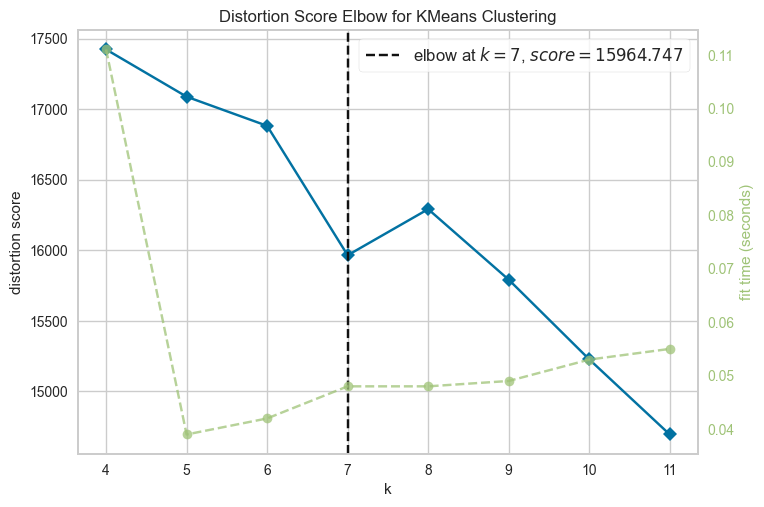

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(pca)
visualizer.show()

5. Nesta questão você deve aplicar métodos de projeção multidimensional para visualizar os dados da segunda questão no espaço visual.

a) aplique os métodos de projeção multidimensional t-SNE e UMAP na representação CountVectorizer e plote os gráfico das projeções resultantes, colorindo os pontos de acordo com os grupos obtidos pelo k-means (questão 4b).

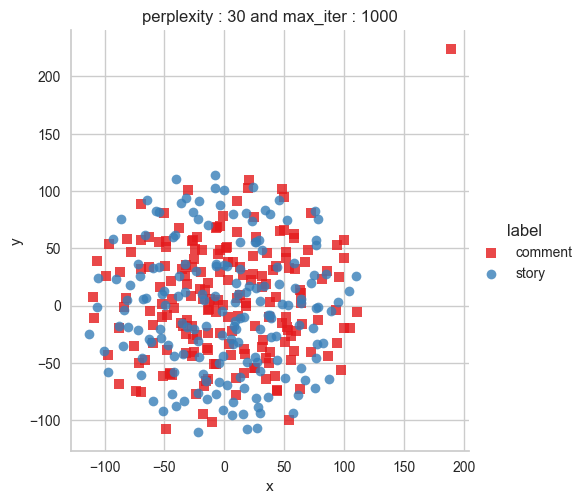

In [25]:
count_vectorizer = CountVectorizer()
x_count_vectorizer = count_vectorizer.fit_transform(data['text'])

tsne = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=3).fit_transform(x_count_vectorizer)

df = pd.DataFrame({'x':tsne[:,0], 'y':tsne[:,1] ,'label':data['type']})

sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, palette="Set1",markers=['s','o'])
plt.title("perplexity : {} and max_iter : {}".format(30, 1000))
plt.show()

<AxesSubplot:>

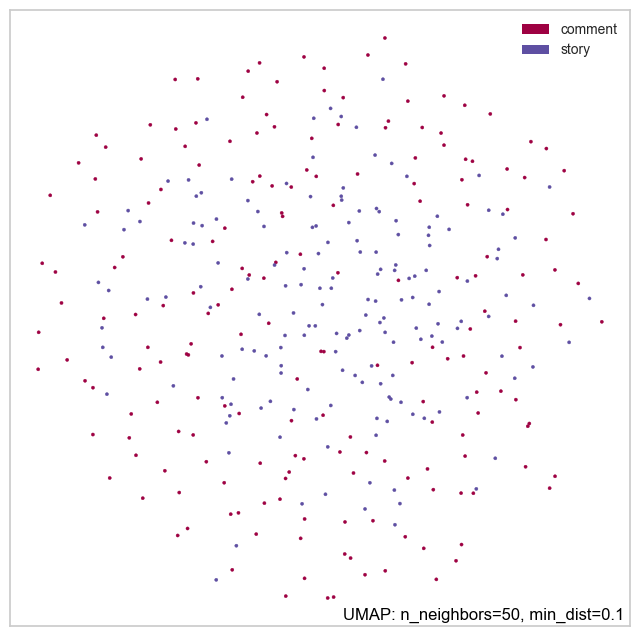

In [27]:
count_vectorizer = CountVectorizer()
x_count_vectorizer = count_vectorizer.fit_transform(data['text'])

embedding = umap.UMAP(n_components=2, n_neighbors=50).fit(x_count_vectorizer)

umap.plot.points(embedding, labels=data['type'])

b) Experimente variar os hiperparâmetros perplexity do t-SNE e n neighbors do UMAP. O que acontece com as projeções quando estes parâmetros são calibrados para valores menores ou maiores do que seus valores padrão?

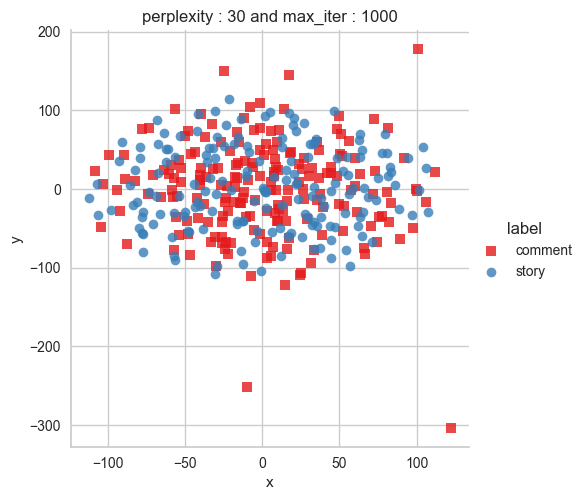

In [28]:
count_vectorizer = CountVectorizer()
x_count_vectorizer = count_vectorizer.fit_transform(data['text'])

tsne = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=50).fit_transform(x_count_vectorizer)

df = pd.DataFrame({'x':tsne[:,0], 'y':tsne[:,1] ,'label':data['type']})

sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, palette="Set1",markers=['s','o'])
plt.title("perplexity : {} and max_iter : {}".format(30, 1000))
plt.show()

<AxesSubplot:>

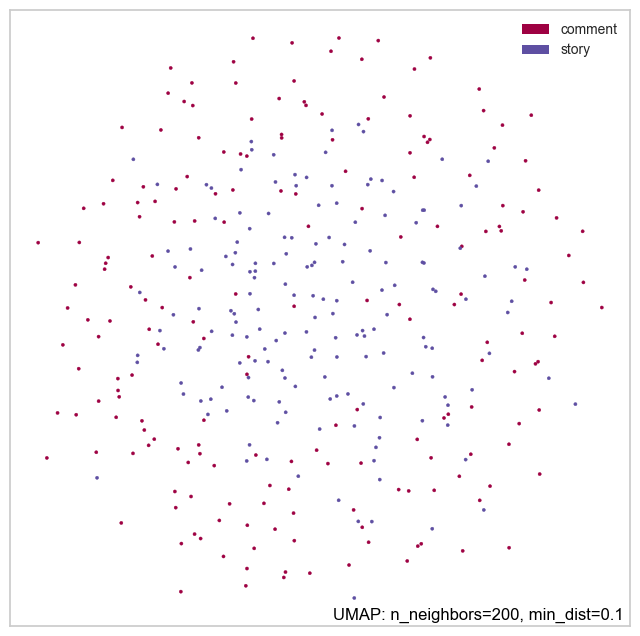

In [29]:
count_vectorizer = CountVectorizer()
x_count_vectorizer = count_vectorizer.fit_transform(data['text'])

embedding = umap.UMAP(n_components=2, n_neighbors=200).fit(x_count_vectorizer)

umap.plot.points(embedding, labels=data['type'])